In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
#hide warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Understanding the Dataset
    a. Import & Inspect the dataset

In [3]:
loan=pd.read_csv("loan.csv")
pd.set_option('display.max_columns',None)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:

print(loan.info(verbose=True,show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

<b>The dataset provided has 39717 records and 111 variables. On examing the columns counts, it can clearly be seen that for a bunch of columns no data has been provided and that those columns are entirely blank and should be removed from further consideration.
There also one or two columns where the no entires seem to be far less than the total no. of records - these need to be further examined to check whether we should consider these in the analysis.  

In [ ]:
# loan.shape
# loan.dtypes

<b> Remove columns with no data entries

In [5]:
loan.dropna(how='all', axis=1, inplace=True)

In [6]:
loan.shape

(39717, 57)

Out of the 111 columns provided - 51 columns had no data and hence were removed.

<b>Check columns which have a small % of entries

In [9]:
(loan.notnull().sum()*100/loan.shape[0]) 
# a.info()
# loan.loc[:,((loan.notnull().sum()*100/loan.shape[0]) < 10.0)]

id                            100.000000
member_id                     100.000000
loan_amnt                     100.000000
funded_amnt                   100.000000
funded_amnt_inv               100.000000
term                          100.000000
int_rate                      100.000000
installment                   100.000000
grade                         100.000000
sub_grade                     100.000000
emp_title                      93.808697
emp_length                     97.293350
home_ownership                100.000000
annual_inc                    100.000000
verification_status           100.000000
issue_d                       100.000000
loan_status                   100.000000
pymnt_plan                    100.000000
url                           100.000000
desc                           67.419493
purpose                       100.000000
title                          99.972304
zip_code                      100.000000
addr_state                    100.000000
dti             

From the above list we see that column 'next_pymnt_d' & 'mths_since_last_record' has data in only 2% & 7% of the column this is a very small number therefore might not provide usefull information and hence should be dropped.


In [10]:
# Remove two columns name is 'next_pymnt_d' and 'mths_since_last_record'
loan.drop(['next_pymnt_d', 'mths_since_last_record'], axis=1, inplace=True)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


Check for columns that have a constant value, if such columns exist then that implies that there is no variation therefore cannot be used to distinguish between customers.

In [11]:
loan.columns[loan.nunique() <= 1]

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [12]:
loan.loc[:,list(loan.columns[loan.nunique() <= 1])]

,pymnt_plan,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,n,f,0.0,1,INDIVIDUAL,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
39712,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
39713,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
39714,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN
39715,n,f,NaN,1,INDIVIDUAL,0,NaN,0,NaN


<b> Remove columns with constant value

In [13]:
loan.drop(list(loan.columns[loan.nunique() <= 1]), axis=1, inplace=True)

In [17]:
loan.shape

(39717, 46)

In [18]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [19]:
loan.shape[0]

39717

In [29]:
loan.nunique() == loan.shape[0]

id                          True
member_id                   True
loan_amnt                  False
funded_amnt                False
funded_amnt_inv            False
term                       False
int_rate                   False
installment                False
grade                      False
sub_grade                  False
emp_title                  False
emp_length                 False
home_ownership             False
annual_inc                 False
verification_status        False
issue_d                    False
loan_status                False
url                         True
desc                       False
purpose                    False
title                      False
zip_code                   False
addr_state                 False
dti                        False
delinq_2yrs                False
earliest_cr_line           False
inq_last_6mths             False
mths_since_last_delinq     False
open_acc                   False
pub_rec                    False
revol_bal 

In [38]:
# # loan.style.set_properties(subset=['url'], **{'width': '500px'})

# loan.style.set_table_styles({
#     'url': [{'selector': '',
#            'props': [('width', '400px')]}],
# }, overwrite=False)
pd.set_option('display.max_colwidth', None)
loan.loc[:,['url','id']]

,url,id
0,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,1077501
1,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,1077430
2,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,1077175
3,https://lendingclub.com/browse/loanDetail.action?loan_id=1076863,1076863
4,https://lendingclub.com/browse/loanDetail.action?loan_id=1075358,1075358
...,...,...
39712,https://lendingclub.com/browse/loanDetail.action?loan_id=92187,92187
39713,https://lendingclub.com/browse/loanDetail.action?loan_id=90665,90665
39714,https://lendingclub.com/browse/loanDetail.action?loan_id=90395,90395
39715,https://lendingclub.com/browse/loanDetail.action?loan_id=90376,90376


examining both columns url and id we find that id is extracted from url. And without the id portion the url is again a constant value. So this column can be dropped as well.

In [39]:
loan.drop('url', axis=1, inplace=True)

In [40]:
loan.shape

(39717, 45)

In [45]:
objColName=list(loan.select_dtypes(include=['object']).columns )
objColName

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'last_pymnt_d',
 'last_credit_pull_d']

In [43]:
# loan['term'].nunique()

2

In [95]:
loan.select_dtypes(include=['object']).head(3)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,desc,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,last_pymnt_d,last_credit_pull_d
0,36 months,10.65%,B,B2,NaN,10+ years,RENT,Verified,Fully Paid,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,Jan-85,83.70%,Jan-15,May-16
1,60 months,15.27%,C,C4,Ryder,< 1 year,RENT,Source Verified,Charged Off,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,Apr-99,9.40%,Apr-13,Sep-13
2,36 months,15.96%,C,C5,NaN,10+ years,RENT,Not Verified,Fully Paid,NaN,small_business,real estate business,606xx,IL,Nov-01,98.50%,Jun-14,May-16


From the above output - we see that we can convert columns 'issue_d','last_pymnt_d'&'last_credit_pull_d' &'earliest_cr_line' from object type to date type 
and columns 'int_rate' & 'revol_util' should be of datatyppe float but are treated as object columns because of the '%'symbol, we can remove the % symbol and convert the column to float.


In [97]:
import datetime as dt
# loan[["issue_d", "last_pymnt_d", "last_credit_pull_d"]] = loan[["issue_d", "last_pymnt_d", "last_credit_pull_d"]].apply(pd.to_datetime)
# loan[["issue_d"]].apply(pd.to_datetime)
# pd.to_datetime(loan["issue_d"], infer_datetime_format=True)
# loan["issue_d"].apply(lambda x: dt.datetime.strptime(x,'%m-%dT') if type(x)==str else pd.NaT)

# pd.to_datetime(loan["last_pymnt_d"],format='%b-%y')
# dt.datetime.strptime(loan["last_pymnt_d"],'%b-%y')
loan["issue_d"]=loan["issue_d"].apply(lambda x: dt.datetime.strptime(x,'%b-%y') if type(x)==str else pd.NaT)
loan["last_pymnt_d"]=loan["last_pymnt_d"].apply(lambda x: dt.datetime.strptime(x,'%b-%y') if type(x)==str else pd.NaT)
loan["last_credit_pull_d"]=loan["last_credit_pull_d"].apply(lambda x: dt.datetime.strptime(x,'%b-%y') if type(x)==str else pd.NaT)

In [98]:
loan["revol_util"] = loan["revol_util"].str.rstrip("%").astype("float") 
loan["int_rate"] = loan["int_rate"].str.rstrip("%").astype("float") 

In [99]:
objColName=list(loan.select_dtypes(include=['object']).columns )
objColName

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line']

In [100]:
for colName in objColName:
    print('The column Name :'+colName+' :'+str(loan[colName].nunique())+' :'+str(loan[colName].dtype))
    print(loan[colName].value_counts())
    print('\n')

The column Name :term :2 :object
 36 months    29096
 60 months    10621
Name: term, dtype: int64


The column Name :grade :7 :object
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64


The column Name :sub_grade :35 :object
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64


The column Name :emp_title :28820 :object
US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College

In [ ]:
After a preview of the above categorical columns the folwing columns are examined in more details:
    addr_state,zip_code
    term,grade,sub_grade
    emp_length
    home_ownership
    verification_status
    loan_status
    purpose

In [104]:
objColName_mod = ['addr_state','zip_code',
    'term','grade','sub_grade',
    'emp_length',
    'home_ownership',
    'verification_status',
    'loan_status',
    'purpose']

In [58]:
# loan.to_csv('loan_modified.csv')
# chk outliers in total payment 

On further consideration I decided to remove the rows where the loan_status is 'current' as these are still active it gives us little information on whether or not these customers would default or not.

In [ ]:
loan.drop(loan.loc[loan['loan_status']=='Current'].index, inplace=True)

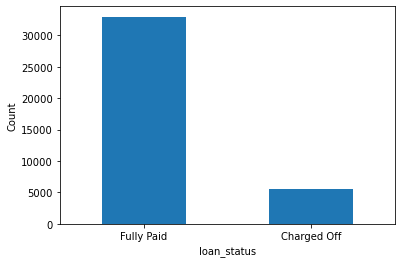

In [121]:
# plt.figure(figsize=(20,10))
ax = loan['loan_status'].value_counts().plot(kind='bar', xlabel='loan_status', ylabel='Count', rot=0)

In [120]:
df_pv=pd.pivot_table(loan,index='loan_status',aggfunc='size')
print(round((df_pv/df_pv.sum())*100))

loan_status
Charged Off    15.0
Fully Paid     85.0
dtype: float64


From the above figure we can see that 85% repaid their loans but the remaining 15% defaulted. Next, I will go through the list of variabale and try and figure out which ones can be used to predict defaulters. First we examin the type of home ownership

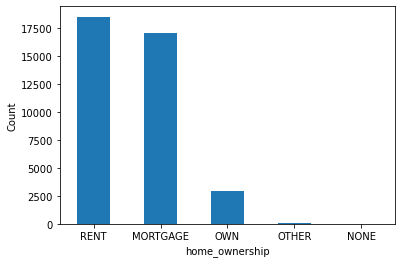

In [122]:
ax = loan['home_ownership'].value_counts().plot(kind='bar', xlabel='home_ownership', ylabel='Count', rot=0)

In [139]:
pd.crosstab(loan.loan_status,loan.home_ownership,margins=True,margins_name='Total')

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT,Total
loan_status,,,,,,
Charged Off,2327,0,18,443,2839,5627
Fully Paid,14694,3,80,2532,15641,32950
Total,17021,3,98,2975,18480,38577


In [135]:
pd.options.display.float_format = '{:,.2f}'.format
# pd.crosstab(loan.loan_status,loan.home_ownership,margins=True,normalize='index')*100
pd.crosstab(loan.loan_status,loan.home_ownership,normalize='columns')*100

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,
Charged Off,13.67,0.00,18.37,14.89,15.36
Fully Paid,86.33,100.00,81.63,85.11,84.64


In [137]:
pd.crosstab(loan.loan_status,loan.home_ownership,margins=True,normalize='index')*100

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,
Charged Off,41.35,0.00,0.32,7.87,50.45
Fully Paid,44.59,0.01,0.24,7.68,47.47
All,44.12,0.01,0.25,7.71,47.90


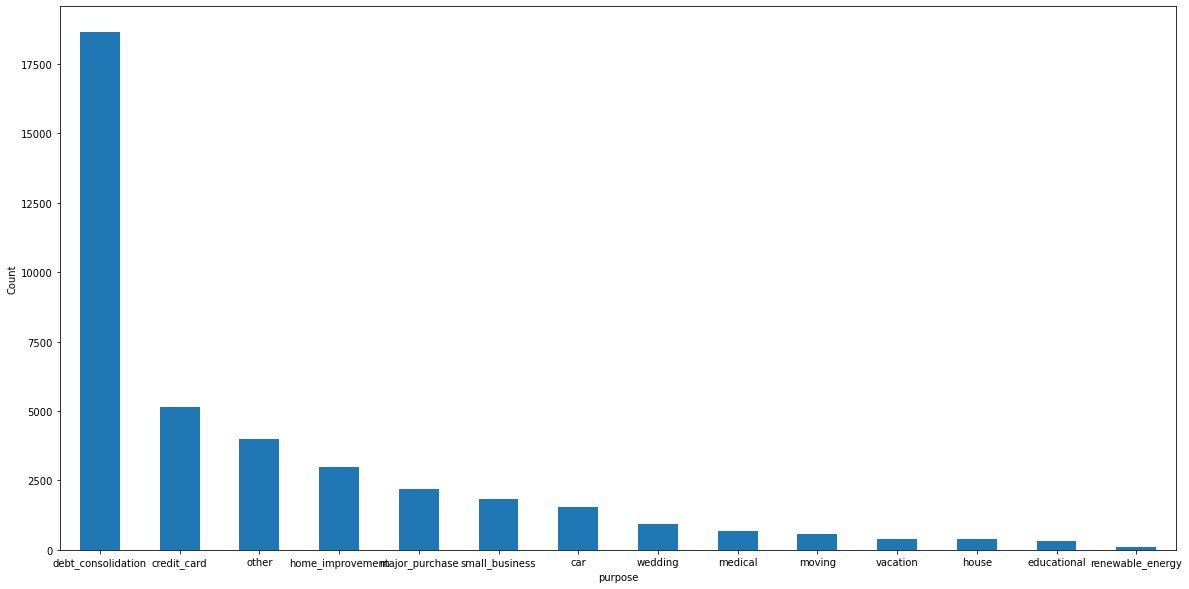

In [114]:
plt.figure(figsize=(20,10))
ax = loan['purpose'].value_counts().plot(kind='bar', xlabel='purpose', ylabel='Count', rot=0)

In [141]:
pd.crosstab(loan.purpose,loan.loan_status,normalize='columns')*100

loan_status,Charged Off,Fully Paid
purpose,,
car,2.84,4.06
credit_card,9.63,13.61
debt_consolidation,49.17,46.40
educational,1.00,0.82
home_improvement,6.17,7.67
house,1.05,0.93
major_purchase,3.95,5.85
medical,1.88,1.75
moving,1.63,1.47


Majority of borrow for debt_consolidation  

In [151]:
loan[loan.loan_status=='Charged Off'].pivot_table(index=['loan_status','purpose'],columns=['home_ownership'],aggfunc='size',fill_value=0).apply(lambda x:100 * x / float(x.sum())).round(2)

home_ownership                  MORTGAGE  OTHER   OWN  RENT
loan_status purpose                                        
Charged Off car                     3.01   5.56  3.39  2.61
            credit_card            10.06  11.11  8.35  9.48
            debt_consolidation     49.20  38.89 43.79 50.05
            educational             0.52   0.00  1.13  1.37
            home_improvement       11.43   5.56  9.48  1.34
            house                   0.82   0.00  0.68  1.30
            major_purchase          3.22   0.00  6.09  4.23
            medical                 1.80   0.00  2.26  1.90
            moving                  0.34   5.56  1.35  2.71
            other                   8.04  11.11 13.54 13.53
            renewable_energy        0.39   0.00  0.23  0.32
            small_business          9.20  22.22  7.90  7.82
            vacation                0.56   0.00  0.90  1.27
            wedding                 1.42   0.00  0.90  2.08

For the differenct types of home-ownership we  see that the most likely to default are people who borrow for debt consolidation.

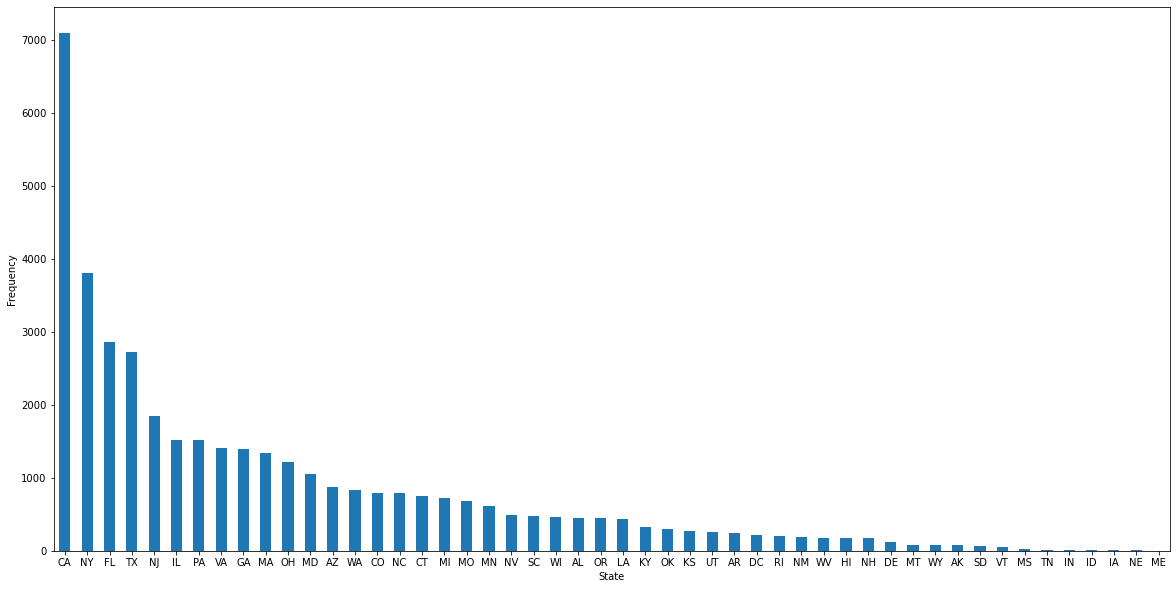

In [105]:
plt.figure(figsize=(20,10))
ax = loan['addr_state'].value_counts().plot(kind='bar', xlabel='State', ylabel='Frequency', rot=0)
# ax.set_ylabel("frequecy")
# ax.set_xlabel("dependent_count")

Majority of the loan applicants are from CA -California, followed by NY,FL,TX
<!-- rank -frequency  -->

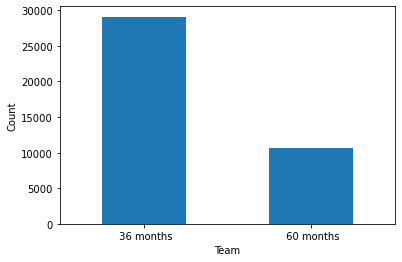

In [107]:
# plt.figure(figsize=(20,10))
ax = loan['term'].value_counts().plot(kind='bar', xlabel='Team', ylabel='Count', rot=0)

Majority of the loans are of a 36Month duaration

In [174]:
loan.pivot_table(index=['term'],columns=['loan_status'],aggfunc='size').apply(lambda x:100 * x / float(x.sum())).round(2)

loan_status,Charged Off,Fully Paid
term,,
36 months,57.35,78.51
60 months,42.65,21.49


In [175]:
loan.pivot_table(index=['loan_status'],columns=['term'],aggfunc='size').apply(lambda x:100 * x / float(x.sum())).round(2)

term,36 months,60 months
loan_status,,
Charged Off,11.09,25.31
Fully Paid,88.91,74.69


In [176]:
loan.pivot_table(index=['term','home_ownership'],columns=['loan_status'],aggfunc='size').apply(lambda x:100 * x / float(x.sum())).round(2)

loan_status                Charged Off  Fully Paid
term       home_ownership                         
 36 months MORTGAGE              20.99       32.84
           NONE                    NaN        0.01
           OTHER                  0.30        0.24
           OWN                    4.48        6.22
           RENT                  31.58       39.20
 60 months MORTGAGE              20.37       11.75
           OTHER                  0.02         NaN
           OWN                    3.39        1.47
           RENT                  18.87        8.27

The ones who Rent are more likely to default when the term duration is 36 months vs 
The ones who pay Mortgage are more likely to default in the case of 60 months

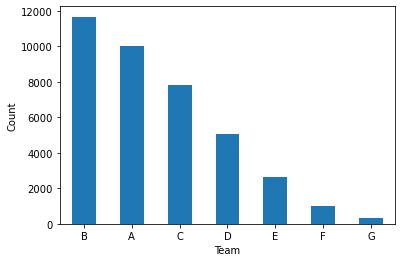

<AxesSubplot:xlabel='Team', ylabel='Count'>

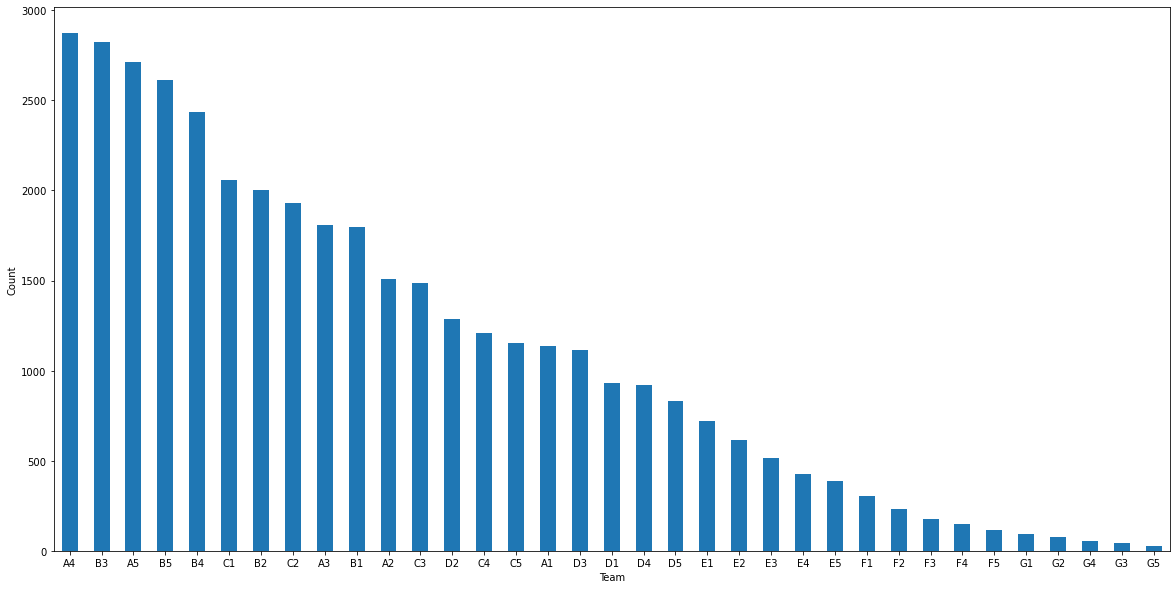

In [173]:
# group grade and subgrade togeher are they correlated?

# plt.figure(figsize=(20,10))
loan['grade'].value_counts().plot(kind='bar', xlabel='Team', ylabel='Count', rot=0)
plt.show()
plt.figure(figsize=(20,10))
loan['sub_grade'].value_counts().plot(kind='bar', xlabel='Team', ylabel='Count', rot=0)

In [167]:
pd.crosstab(loan.sub_grade,loan.grade,normalize='index')

grade,A,B,C,D,E,F,G
sub_grade,,,,,,,
A1,1.00,0.00,0.00,0.00,0.00,0.00,0.00
A2,1.00,0.00,0.00,0.00,0.00,0.00,0.00
A3,1.00,0.00,0.00,0.00,0.00,0.00,0.00
A4,1.00,0.00,0.00,0.00,0.00,0.00,0.00
A5,1.00,0.00,0.00,0.00,0.00,0.00,0.00
B1,0.00,1.00,0.00,0.00,0.00,0.00,0.00
B2,0.00,1.00,0.00,0.00,0.00,0.00,0.00
B3,0.00,1.00,0.00,0.00,0.00,0.00,0.00
B4,0.00,1.00,0.00,0.00,0.00,0.00,0.00


Grade is futher sub divide into sub_grade


In [170]:
loan[loan.loan_status=='Charged Off'].pivot_table(index=['term','grade'],columns=['loan_status'],aggfunc='size').apply(lambda x:100 * x / float(x.sum())).round(2)

loan_status       Charged Off  Fully Paid
term       grade                         
 36 months A            10.04       27.57
           B            17.50       25.33
           C            15.00       14.89
           D            10.31        8.05
           E             3.13        2.10
           F             1.00        0.47
           G             0.37        0.11
 60 months A             0.66        1.09
           B             7.82        5.78
           C             8.94        4.80
           D             9.56        3.99
           E             9.58        3.81
           F             4.67        1.52
           G             1.42        0.49

Those who belong to grade B are more likely to default for term of 36 months
<br>
Those who belong to grade D,E are more likely to default for term of 60 months

In [181]:
loan['int_rate'].describe()

count   38,577.00
mean        11.93
std          3.69
min          5.42
25%          8.94
50%         11.71
75%         14.38
max         24.40
Name: int_rate, dtype: float64

In [217]:
Upper_R = loan['int_rate'].describe()[6]
Lower_R = loan['int_rate'].describe()[4]
IQR=Upper_R-Lower_R
print('IQR :'+str(IQR)+', lower cutoff '+str(Upper_R+1.5* IQR))

IQR :5.440000000000001, lower cutoff 22.540000000000003


In [201]:
import numpy as np
bins_list=np.arange(loan['int_rate'].min(), loan['int_rate'].max(), 1.5).tolist()
print(np.size(bins_list))
print((bins_list))

13
[5.42, 6.92, 8.42, 9.92, 11.42, 12.92, 14.42, 15.92, 17.42, 18.92, 20.42, 21.92, 23.42]


In [189]:
loan['int_rate_bin'] = pd.cut(loan['int_rate'],bins_list)

<AxesSubplot:>

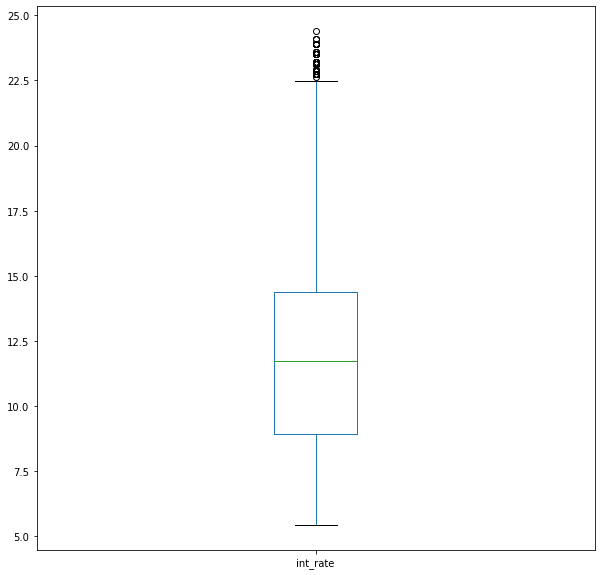

In [194]:
plt.figure(figsize=(10,10))
loan.boxplot (column =['int_rate'], grid = False) 

In [197]:
loan[loan['int_rate']>22.5].shape

(65, 46)

In [200]:
loan.pivot_table(index=['int_rate_bin'],columns=['loan_status'],aggfunc='size')

loan_status,Charged Off,Fully Paid
int_rate_bin,,
"(5.42, 8.42]",425,7305
"(8.42, 11.42]",993,8298
"(11.42, 14.42]",1820,9604
"(14.42, 17.42]",1392,5088
"(17.42, 20.42]",752,1761
"(20.42, 23.42]",216,327
